In [1]:
import pandas as pd
import numpy as np
from os import path

from scipy.signal import resample

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
# sns.set_theme(style="whitegrid")
mpl.style.use('seaborn-notebook')
sorted(mpl.style.available)


#adding local modules
import sys
module_path = path.abspath(path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from preprocess.biodarw_feature_extraction import extract_residues, extract_radio
from loaders.biodarw import load_arquimedes_dataset

# setting up variables
doc_path = "/data/elekin/doc"
coefficients=17
et = "T001"
ct ="C01"
features = ['x', 'y', 'timestamp', 'pen_up', 'azimuth', 'altitude', 'pressure']

%matplotlib inline

In [2]:
HDFStore=pd.HDFStore

Loading previously extracted features from radius and residues from Discrete Cosine Transform. They were in hdf5 format. The file contains the following datasets:

* /source/dataset: origin raw data
* /source/labels: original labels ET-1 and CT-0
* /result/radius/r: radius
* /result/radius/features: temporal and frequency fetures extracted from radius
* /result/residues/rd: residues
* /result/residues/features: temporal and frequency fetures extracted from residues


In [3]:
metadf=pd.read_csv(path.join("/data/elekin/doc","metadata-202106-v1.csv"),index_col=0)
metadf.head(10)

,abs_path,relative_path,temblor,Sexo,TRS,age,level
name,,,,,,,
C01_1,/data/elekin/data/origin/ethw/Controles30jun14...,C01/session00002/u00003s00002_hw000011.svc,no,F,0,27,0
C01_2,/data/elekin/data/origin/ethw/Controles30jun14...,C01/session00002/u00003s00002_hw000012.svc,no,F,0,27,0
C02_1,/data/elekin/data/origin/ethw/Controles30jun14...,C02/session00001/u00004s00001_hw000011.svc,no,F,0,29,0
C02_2,/data/elekin/data/origin/ethw/Controles30jun14...,C02/session00001/u00004s00001_hw000012.svc,no,F,0,29,0
C03_1,/data/elekin/data/origin/ethw/Controles30jun14...,C03/session00001/u00005s00001_hw000011.svc,no,F,0,32,0
C03_2,/data/elekin/data/origin/ethw/Controles30jun14...,C03/session00001/u00005s00001_hw000012.svc,no,F,0,32,0
C04_1,/data/elekin/data/origin/ethw/Controles30jun14...,C04/session00001/u00006s00001_hw000011.svc,no,M,0,32,0
C04_2,/data/elekin/data/origin/ethw/Controles30jun14...,C04/session00001/u00006s00001_hw000012.svc,no,M,0,32,0
C05_1,/data/elekin/data/origin/ethw/Controles30jun14...,C05/session00001/u00007s00001_hw000011.svc,no,M,0,22,0


In [4]:
def read(filename):
    df = pd.read_csv(filename, sep="\s+", header=None, names=features, skiprows=1)
    return df

In [5]:
dataset = None
for i, filename in zip(metadf.index, metadf["abs_path"]) :
    tmp_df = read(filename)
    tmp_df['subject_id'] = i
    dataset = pd.concat([tmp_df,dataset])
tmp_df.head(10)

,x,y,timestamp,pen_up,azimuth,altitude,pressure,subject_id
0,3880,5330,1368624260328,1,120,590,1229,C107_2
1,3870,5330,1368624260359,1,120,590,1229,C107_2
2,3870,5330,1368624260531,0,120,590,0,C107_2
3,5310,7740,1368624263405,0,120,590,0,C107_2
4,5306,7747,5208200,0,2620,520,0,C107_2
5,5306,7747,5208207,0,2620,530,0,C107_2
6,5306,7748,5208215,0,2620,530,0,C107_2
7,5309,7751,5208222,0,2620,530,0,C107_2
8,5316,7756,5208230,0,2620,530,0,C107_2
9,5325,7764,5208237,0,2620,530,0,C107_2


In [6]:
r = dataset.groupby('subject_id').apply(extract_radio).apply(resample, num=4096)
rd = dataset.groupby('subject_id').apply(extract_residues, c=coefficients).apply(resample, num=4096)
rd.head(10)

subject_id
C01_1    [2616.4949765716074, 2603.5748507231856, 2615....
C01_2    [4167.778041769817, 4191.983503917505, 4167.78...
C02_1    [2316.313493633803, 2255.653513365526, 2288.63...
C02_2    [3810.3898672324954, 3799.2503591318928, 3809....
C03_1    [2267.1415059322244, 2249.6739320694646, 2266....
C03_2    [3811.5503940134927, 3809.392095740382, 3812.7...
C04_1    [2514.1443288376327, 2512.2306562770777, 2514....
C04_2    [3832.8458983889827, 3826.680836983418, 3836.8...
C05_1    [2347.6360910571384, 2339.75150353656, 2350.68...
C05_2    [3707.2402077311253, 3712.9546501434256, 3706....
dtype: object

In [92]:
dataset[dataset["subject_id"]=="C106_1"]

,x,y,timestamp,pen_up,azimuth,altitude,pressure,subject_id
0,4060,5320,1368623359343,1,400,370,1229,C106_1
1,4060,5320,1368623359484,0,400,370,0,C106_1
2,5450,2540,1368623368937,0,400,370,0,C106_1
3,5446,2549,4314009,0,610,610,0,C106_1
4,5446,2549,4314016,0,610,610,0,C106_1
...,...,...,...,...,...,...,...,...
3206,5664,3861,4346462,1,90,770,1944,C106_1
3207,5664,3861,4346469,1,90,770,1858,C106_1
3208,5664,3861,4346477,1,90,770,1684,C106_1
3209,5664,3861,4346484,1,90,770,1317,C106_1


In [8]:
rd_df = pd.DataFrame(rd.tolist(), index=rd.index)
rd_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
subject_id,,,,,,,,,,,,,,,,,,,,,
C01_1,2616.494977,2603.574851,2615.779950,2624.033204,2618.051843,2611.919996,2615.301600,2619.929647,2617.352375,2612.779288,...,2710.031486,2708.866591,2713.750870,2716.039478,2709.186923,2704.188985,2713.697295,2724.906692,2709.008099,2661.917377
C01_2,4167.778042,4191.983504,4167.788500,4153.906841,4166.734844,4175.513013,4165.897571,4158.578102,4165.571963,4171.245721,...,3992.037378,3998.828241,3992.366378,3983.943586,3992.937826,4005.511142,3991.993073,3968.344815,3992.445994,4079.987502
C02_1,2316.313494,2255.653513,2288.636990,2338.955456,2346.077098,2316.014762,2294.409265,2305.277421,2328.560089,2333.421467,...,2656.925026,2687.498288,2694.523426,2676.595863,2671.904250,2713.305348,2774.437250,2777.527899,2668.200991,2480.439478
C02_2,3810.389867,3799.250359,3809.251681,3812.917888,3804.898521,3800.272263,3803.247152,3803.214081,3796.953952,3792.505681,...,3888.587302,3884.934062,3886.722941,3891.707131,3889.247678,3882.607761,3887.016589,3898.511396,3889.736159,3850.682162
C03_1,2267.141506,2249.673932,2266.871954,2277.587148,2268.662020,2260.977152,2266.722216,2272.881263,2268.971102,2263.949978,...,2361.801503,2358.315537,2365.294818,2371.338872,2364.812912,2360.305239,2378.474975,2402.913606,2389.741610,2329.063761
C03_2,3811.550394,3809.392096,3812.793686,3814.089044,3812.806864,3813.263648,3815.586251,3816.831202,3816.804984,3816.932940,...,3831.898004,3831.623686,3831.343367,3832.380240,3832.652731,3831.082385,3831.142307,3833.601195,3831.787894,3821.906755
C04_1,2514.144329,2512.230656,2514.624837,2515.053243,2513.576047,2513.685876,2514.675936,2514.300085,2513.653502,2514.138691,...,2521.099771,2520.918384,2520.489926,2521.706256,2522.571136,2521.283624,2521.558542,2525.743593,2527.723924,2522.020953
C04_2,3832.845898,3826.680837,3836.820798,3829.918422,3831.296303,3833.640764,3828.979551,3832.515552,3833.491962,3830.931258,...,3894.473115,3891.903663,3894.271819,3894.244339,3891.253381,3896.260209,3892.679320,3890.468637,3902.923123,3880.488017
C05_1,2347.636091,2339.751504,2350.684227,2350.490043,2344.732659,2347.386162,2350.201973,2347.150553,2346.675543,2349.464264,...,2422.373702,2420.083436,2412.710935,2413.069001,2418.294056,2413.879559,2410.047716,2421.093235,2422.210202,2388.035153


Loading labels based on clinic, residues and features from residues.


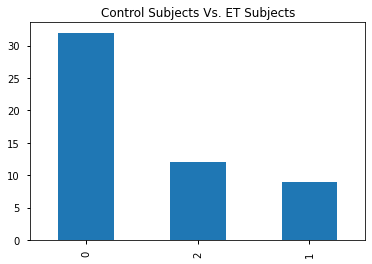

In [9]:
y = metadf['level']
ax = y.value_counts().plot.bar(title='Control Subjects Vs. ET Subjects')


## Residues Analysis based on Pearson Correlation

As the first step we can try to visualy identify correlation between features and also with target class

0.46827977711140484

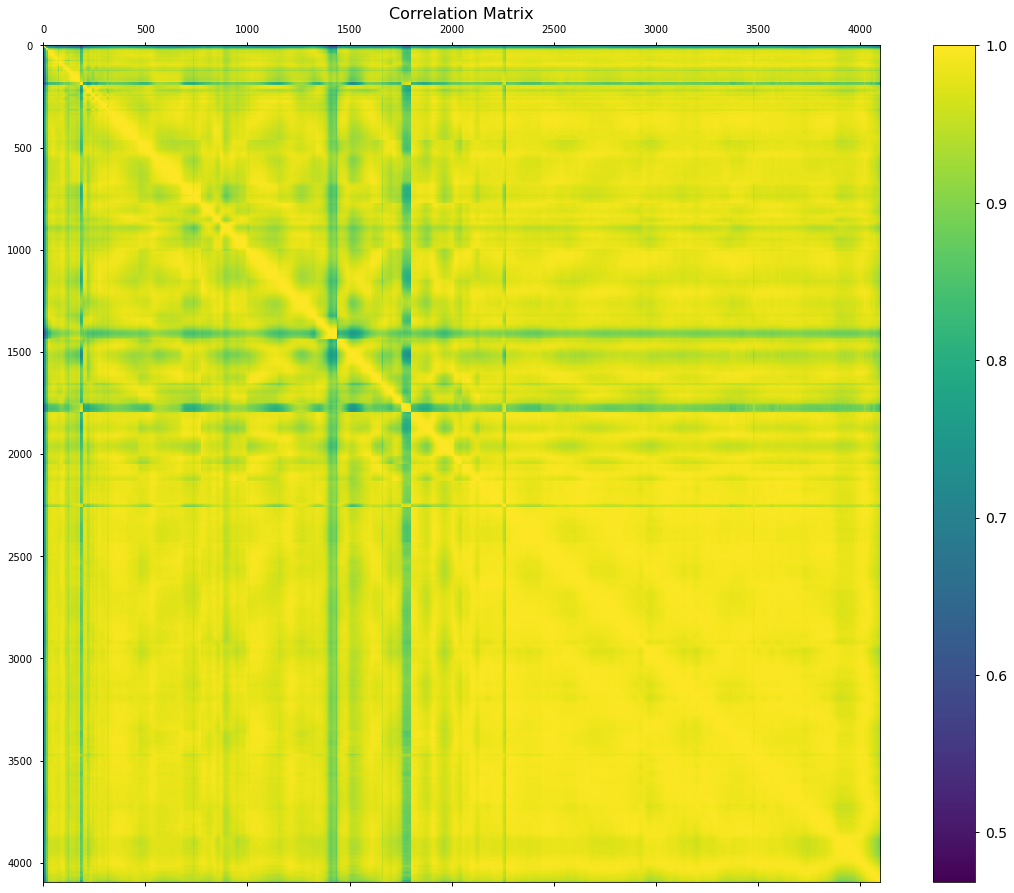

In [10]:
df=rd_df
f = plt.figure(figsize=(19, 15))
corrMatrix = df.corr("pearson")
plt.matshow(corrMatrix, fignum=f.number, cmap="viridis")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
corrMatrix.abs().min().min()

In [11]:
rd_df.rolling(256, axis=1).mean().dropna(1).columns

Int64Index([ 255,  256,  257,  258,  259,  260,  261,  262,  263,  264,
            ...
            4086, 4087, 4088, 4089, 4090, 4091, 4092, 4093, 4094, 4095],
           dtype='int64', length=3841)

0.7534822280175617

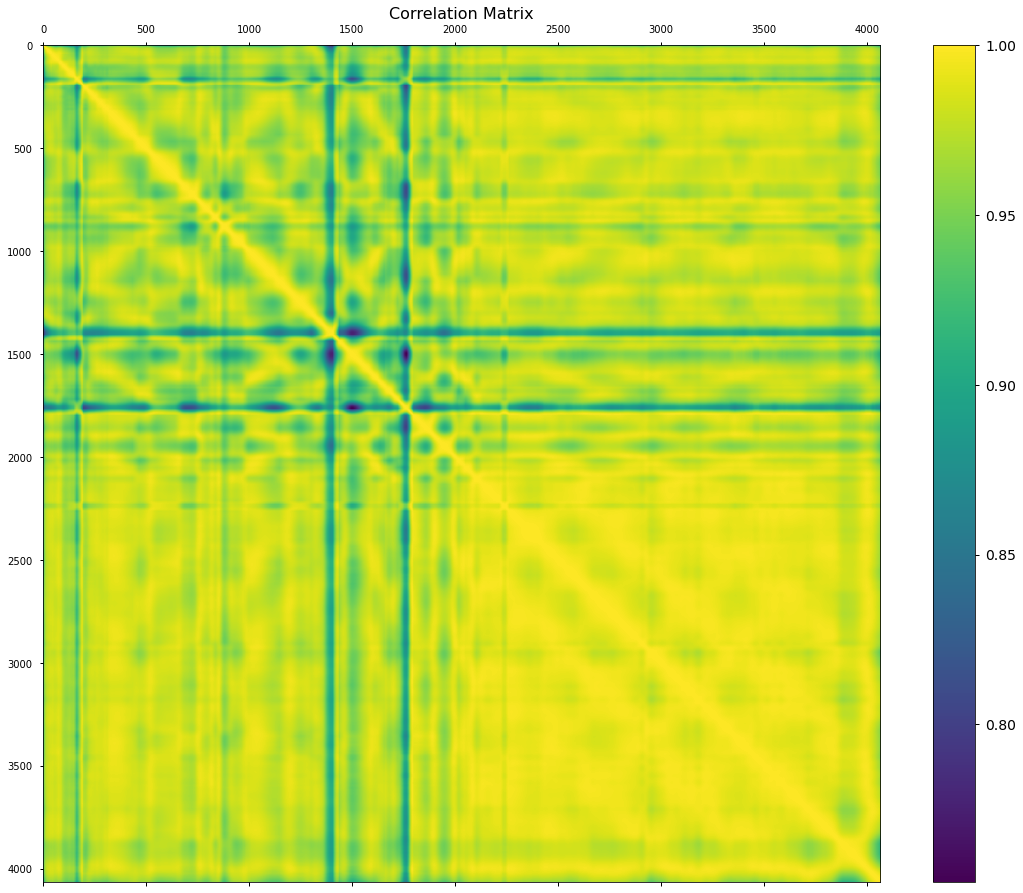

In [12]:
denom = 128
l = len(rd_df.T)
f = plt.figure(figsize=(19, 15))

corrMatrix = rd_df.rolling(round(l/denom), axis=1).mean().dropna(axis=1).corr("pearson")

plt.matshow(corrMatrix, fignum=f.number, cmap="viridis")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

corrMatrix.abs().min().min()

In [13]:
rd_df.index

Index(['C01_1', 'C01_2', 'C02_1', 'C02_2', 'C03_1', 'C03_2', 'C04_1', 'C04_2',
       'C05_1', 'C05_2', 'C06_1', 'C06_2', 'C07_1', 'C07_2', 'C08', 'C101_1',
       'C101_2', 'C102_1', 'C102_2', 'C103_1', 'C103_2', 'C104_1', 'C104_2',
       'C106_1', 'C106_2', 'C107_1', 'C107_2', 'T001', 'T002_1', 'T002_2',
       'T005', 'T006', 'T007', 'T008', 'T009', 'T010', 'T011_1', 'T011_2',
       'T012_1', 'T012_2', 'T013', 'T014', 'T015', 'T018', 'T021', 'T023_1',
       'T023_2', 'T025', 'T026', 'T027', 'T028_1', 'T028_2', 'T029'],
      dtype='object', name='subject_id')

3.572449946582912e-05

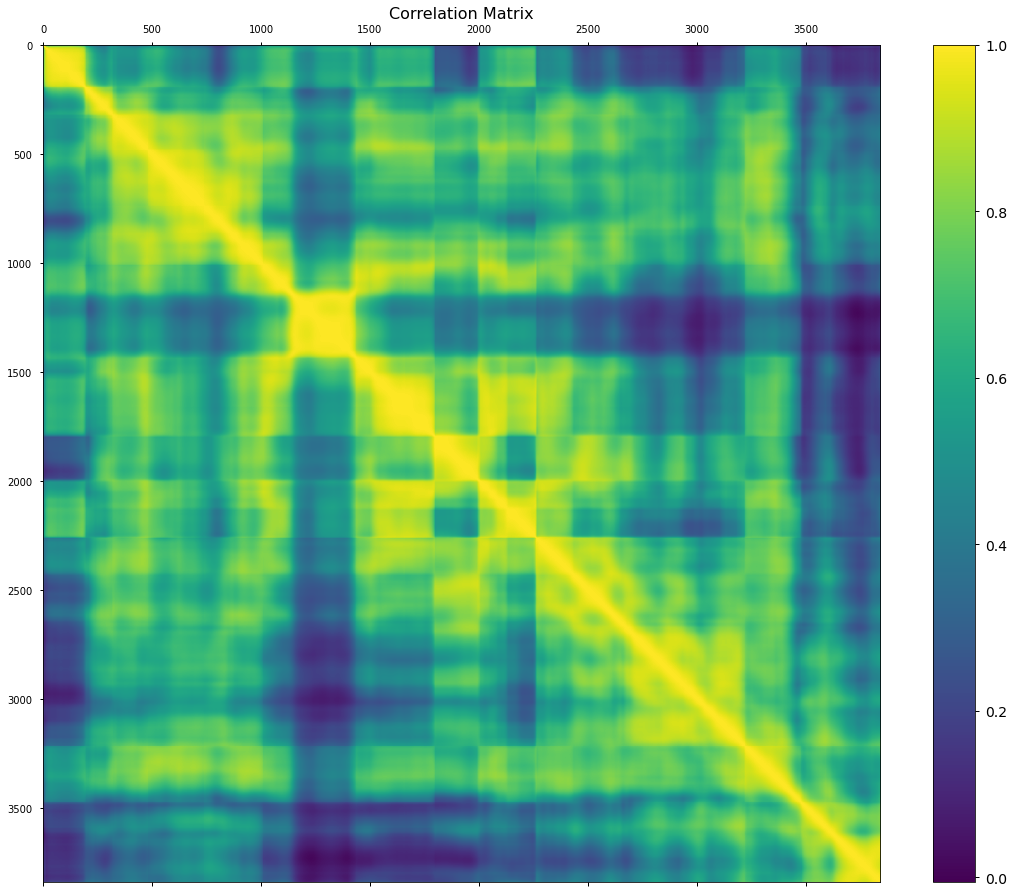

In [14]:
denom = 16
l = len(rd_df.T)
corrMatrix = rd_df.rolling(round(l/denom), axis=1).std().dropna(axis=1).corr("pearson")
f = plt.figure(figsize=(19, 15))
plt.matshow(corrMatrix, fignum=f.number, cmap="viridis")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
corrMatrix.abs().min().min()

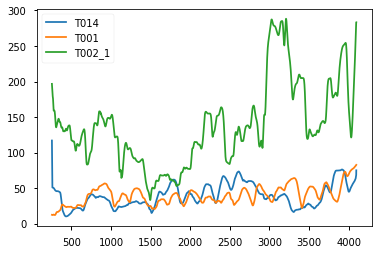

In [15]:
rd_df.rolling(round(l/denom), axis=1).std().dropna(axis=1).loc["T014"].plot(legend=True)
rd_df.rolling(round(l/denom), axis=1).std().dropna(axis=1).loc["T001"].plot(legend=True)
_=rd_df.rolling(round(l/denom), axis=1).std().dropna(axis=1).loc["T002_1"].plot(legend=True)


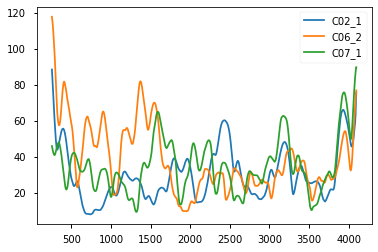

In [16]:
rd_df.rolling(round(l/denom), axis=1).std().dropna(axis=1).loc["C02_1"].plot(legend=True)
rd_df.rolling(round(l/denom), axis=1).std().dropna(axis=1).loc["C06_2"].plot(legend=True)
_=rd_df.rolling(round(l/denom), axis=1).std().dropna(axis=1).loc["C07_1"].plot(legend=True)

There is strong correlation between all the data points

In [17]:
labels = metadf["level"]
labels.values.astype('int8').shape

(53,)

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
random_state = 0

X_train=rd_df.rolling(round(l/denom), axis=1).std().dropna(axis=1)
y_train=labels.values

In [39]:
X_train

,255,256,257,258,259,260,261,262,263,264,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
subject_id,,,,,,,,,,,,,,,,,,,,,
C01_1,24.478559,24.391023,24.372850,24.292613,24.157133,24.065728,24.013462,23.942524,23.842798,23.762537,...,59.530071,59.996408,60.495464,61.006136,61.456628,61.865527,62.341261,62.900792,63.328741,63.479527
C01_2,73.943433,73.453077,72.762408,72.257130,71.844414,71.335110,70.750805,70.235361,69.769105,69.245135,...,42.074039,42.380281,42.732281,43.148905,43.476072,43.699146,44.018161,44.542299,44.837994,44.779783
C02_1,88.395436,87.712977,86.441757,85.480322,84.926129,84.412263,83.651938,82.677284,81.785961,81.082765,...,63.485649,64.861268,66.283265,67.438325,68.502309,70.034376,72.399682,74.712577,75.565425,75.482972
C02_2,87.372680,87.453398,87.522543,87.598863,87.675112,87.745197,87.811827,87.881172,87.947703,88.004973,...,20.631620,20.729598,20.837298,20.977897,21.097463,21.171437,21.269597,21.452098,21.564952,21.547338
C03_1,61.589324,61.163958,60.589111,60.144664,59.771925,59.327174,58.812962,58.336978,57.901774,57.428296,...,29.600525,29.704192,29.768016,29.802628,29.860363,29.933837,29.928758,29.891760,29.858719,30.139183
C03_2,54.060989,54.605450,55.158396,55.712575,56.270299,56.831297,57.388751,57.939149,58.485801,59.031695,...,33.341530,33.352250,33.360930,33.371374,33.381599,33.386074,33.387367,33.391536,33.390380,33.373142
C04_1,9.746307,9.900247,10.047845,10.201047,10.358521,10.513531,10.666726,10.823848,10.983294,11.139881,...,45.944355,45.976311,46.007539,46.034124,46.057635,46.083187,46.106427,46.118698,46.125882,46.143514
C04_2,36.777091,36.914245,37.011377,37.190313,37.321427,37.475037,37.651903,37.797046,37.985132,38.185077,...,28.477513,28.549481,28.612083,28.675299,28.752702,28.808529,28.879936,28.961667,28.994723,29.129766
C05_1,46.104293,46.041207,45.928089,45.872913,45.816158,45.727145,45.651473,45.590748,45.513567,45.432112,...,20.300547,20.257907,20.202121,20.141568,20.082347,20.016832,19.947295,19.881419,19.813575,19.787595


In [40]:
# Reduce dimension with LDA
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train, y_train)
X_train_lda=lda.transform(X_train)

In [41]:
df_lda=pd.DataFrame(X_train_lda, columns=["LDA1", "LDA2"])
df_lda["labels"]=y_train.T
df_lda.head()

,LDA1,LDA2,labels
0,0.233140,0.370323,0
1,-2.168482,2.485546,0
2,1.020966,1.514484,0
3,-2.784214,0.403785,0
4,-1.738395,1.773700,0


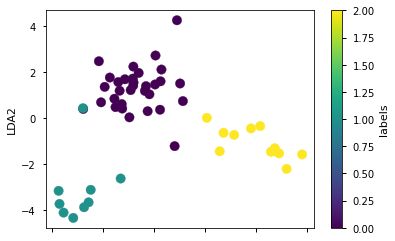

In [42]:
_=df_lda.plot.scatter(x="LDA1", y="LDA2", c="labels", s=90, cmap="viridis", legend=True)

In [43]:
# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=3, random_state=random_state))
# Fit the method's model
pca.fit(X_train, y_train)
X_train_pca=pca.transform(X_train)

In [44]:
X_train

,255,256,257,258,259,260,261,262,263,264,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
subject_id,,,,,,,,,,,,,,,,,,,,,
C01_1,24.478559,24.391023,24.372850,24.292613,24.157133,24.065728,24.013462,23.942524,23.842798,23.762537,...,59.530071,59.996408,60.495464,61.006136,61.456628,61.865527,62.341261,62.900792,63.328741,63.479527
C01_2,73.943433,73.453077,72.762408,72.257130,71.844414,71.335110,70.750805,70.235361,69.769105,69.245135,...,42.074039,42.380281,42.732281,43.148905,43.476072,43.699146,44.018161,44.542299,44.837994,44.779783
C02_1,88.395436,87.712977,86.441757,85.480322,84.926129,84.412263,83.651938,82.677284,81.785961,81.082765,...,63.485649,64.861268,66.283265,67.438325,68.502309,70.034376,72.399682,74.712577,75.565425,75.482972
C02_2,87.372680,87.453398,87.522543,87.598863,87.675112,87.745197,87.811827,87.881172,87.947703,88.004973,...,20.631620,20.729598,20.837298,20.977897,21.097463,21.171437,21.269597,21.452098,21.564952,21.547338
C03_1,61.589324,61.163958,60.589111,60.144664,59.771925,59.327174,58.812962,58.336978,57.901774,57.428296,...,29.600525,29.704192,29.768016,29.802628,29.860363,29.933837,29.928758,29.891760,29.858719,30.139183
C03_2,54.060989,54.605450,55.158396,55.712575,56.270299,56.831297,57.388751,57.939149,58.485801,59.031695,...,33.341530,33.352250,33.360930,33.371374,33.381599,33.386074,33.387367,33.391536,33.390380,33.373142
C04_1,9.746307,9.900247,10.047845,10.201047,10.358521,10.513531,10.666726,10.823848,10.983294,11.139881,...,45.944355,45.976311,46.007539,46.034124,46.057635,46.083187,46.106427,46.118698,46.125882,46.143514
C04_2,36.777091,36.914245,37.011377,37.190313,37.321427,37.475037,37.651903,37.797046,37.985132,38.185077,...,28.477513,28.549481,28.612083,28.675299,28.752702,28.808529,28.879936,28.961667,28.994723,29.129766
C05_1,46.104293,46.041207,45.928089,45.872913,45.816158,45.727145,45.651473,45.590748,45.513567,45.432112,...,20.300547,20.257907,20.202121,20.141568,20.082347,20.016832,19.947295,19.881419,19.813575,19.787595


In [45]:
df_pca=pd.DataFrame(X_train_pca[:,:3], columns=["component1", "component2", "component3"])
df_pca["labels"]=y_train.T
df_pca.head()

,component1,component2,component3,labels
0,-26.431705,2.577739,3.568671,0
1,-29.873663,6.287353,5.805415,0
2,-27.402698,4.263046,3.322566,0
3,-27.630520,12.328328,2.908019,0
4,-32.262942,3.633015,5.258738,0


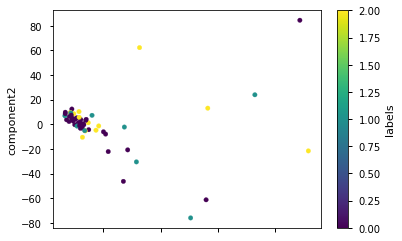

In [47]:
_=df_pca.plot.scatter(x="component1", y="component2", c="labels", cmap="viridis")

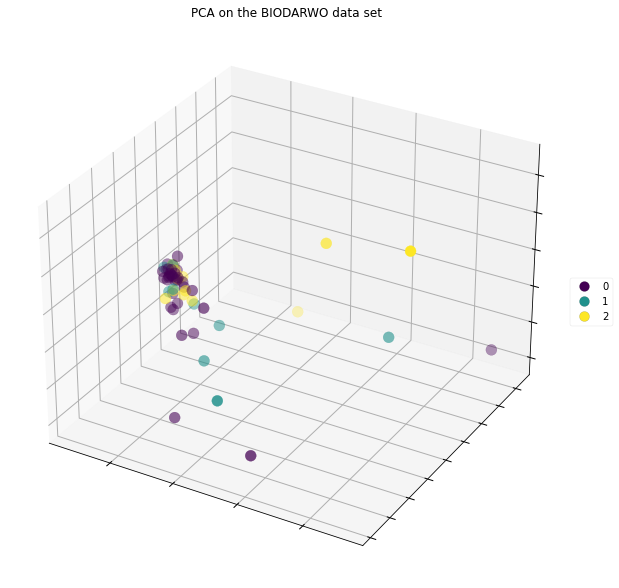

In [48]:
# Plot initialisation
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_pca['component1'], 
           df_pca['component2'], 
           df_pca['component3'], c=df_pca.labels, cmap="viridis", s=120)
    
# label the axes
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")

ax.set_xticklabels("")
ax.set_yticklabels("")
ax.set_zticklabels("")

colors = [sc.cmap(sc.norm(i)) for i in [0.0, 1.0, 2.0]]

custom_lines = [plt.Line2D([],[], ls="", marker='.', 
                mec='k', mfc=c, mew=.1, ms=20) for c in colors]

ax.legend(custom_lines, ['0','1', '2'], loc='center left', bbox_to_anchor=(1.0, 0.5))

ax.set_title("PCA on the BIODARWO data set")
plt.show()

In [49]:
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

score='accuracy'
X = X_train_lda
y = y_train

loo = LeaveOneOut()

In [76]:
# svm model
clf = SVC(kernel='rbf', gamma=1e-1, C=10**0)

cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)
print("train score svm: {}".format(cv['train_score'].mean()))
print("test score svm: {}".format(cv['test_score'].mean()))

train score svm: 0.9811320754716982
test score svm: 0.9811320754716981


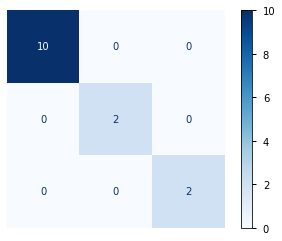

In [78]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues) 
_=plt.axis('off')

In [85]:
# RandomForest
clf = RandomForestClassifier(n_estimators=15, random_state=42)

cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)
print("train score RandomForest: {}".format(cv['train_score'].mean()))
print("test score RandomForest: {}".format(cv['test_score'].mean()))

train score RandomForest: 1.0
test score RandomForest: 0.9245283018867925


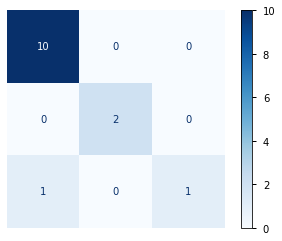

In [87]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues) 
_=plt.axis('off')

In [88]:
# Knn
clf = KNeighborsClassifier(n_neighbors=4, algorithm='ball_tree', metric='euclidean')

cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)
print("train score Knn: {}".format(cv['train_score'].mean()))
print("test score Knn: {}".format(cv['test_score'].mean()))

train score Knn: 0.9811320754716982
test score Knn: 0.9811320754716981


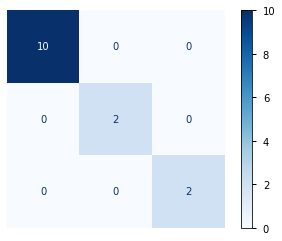

In [89]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues) 
_=plt.axis('off')

In [90]:
# predictive model
clf = LDA()

cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)
print("train score svm")
print(cv['train_score'].mean())
print("test score svm")
print(cv['test_score'].mean())

train score svm
0.9811320754716982
test score svm
0.9811320754716981


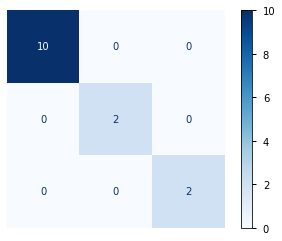

In [91]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues) 
_=plt.axis('off')